<a href="https://colab.research.google.com/github/RajanishKrYadav/Diabetes_prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from google.colab import files


uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [7]:
# Assuming the file was called 'example.txt'
filename = 'diabetes.csv'

with open(filename, 'r') as file:
    content = file.read()
    print("File contents:\n")
    print(content)


File contents:

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1

In [8]:
data = pd.read_csv("diabetes.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.shape

(768, 9)

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
X = data.drop(['Outcome'],axis=1)
y = data.Outcome

In [17]:
y.value_counts()

,count
Outcome,
0,500
1,268


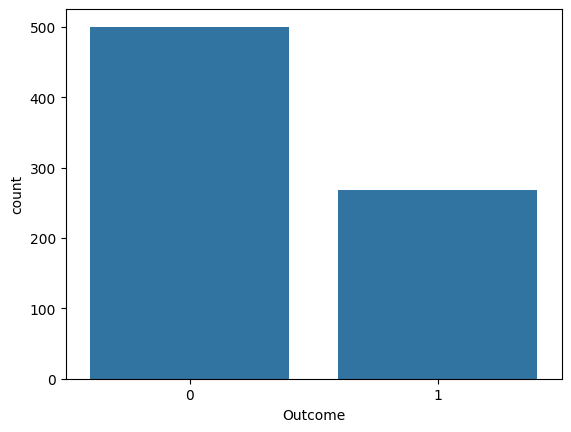

In [20]:
sns.countplot(data=data,x=y)
plt.show()

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(sampling_strategy=1)

X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

undersampler = RandomUnderSampler(sampling_strategy='majority')


X_balanced, y_balanced = undersampler.fit_resample(X_oversampled, y_oversampled)

In [22]:
print("Counts after balancing:")
print(pd.Series(y).value_counts())

Counts after balancing:
Outcome
0    500
1    268
Name: count, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_lr', LogisticRegression())
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_svm', SVC())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_dt', DecisionTreeClassifier())
])
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_knn', KNeighborsClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_rf', RandomForestClassifier())
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_nb', GaussianNB())
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_gb', GradientBoostingClassifier())
])

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_xgb', xgb.XGBClassifier())
])

pipeline_lr.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_nb.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)


accuracy_lr = pipeline_lr.score(X_test, y_test)
accuracy_svm = pipeline_svm.score(X_test, y_test)
accuracy_dt = pipeline_dt.score(X_test, y_test)
accuracy_knn = pipeline_knn.score(X_test, y_test)
accuracy_rf = pipeline_rf.score(X_test, y_test)
accuracy_nb = pipeline_nb.score(X_test, y_test)
accuracy_gb = pipeline_gb.score(X_test, y_test)
accuracy_xgb = pipeline_xgb.score(X_test, y_test)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Accuracy of K-Nearest Neighbors:", accuracy_knn)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of Naive Bayes:", accuracy_nb)
print("Accuracy of Gradient Boosting:", accuracy_gb)
print("Accuracy of XGBoost:", accuracy_xgb)

Accuracy of Logistic Regression: 0.7532467532467533
Accuracy of SVM: 0.7337662337662337
Accuracy of Decision Tree: 0.7727272727272727
Accuracy of K-Nearest Neighbors: 0.6948051948051948
Accuracy of Random Forest: 0.7402597402597403
Accuracy of Naive Bayes: 0.7662337662337663
Accuracy of Gradient Boosting: 0.7467532467532467
Accuracy of XGBoost: 0.7077922077922078


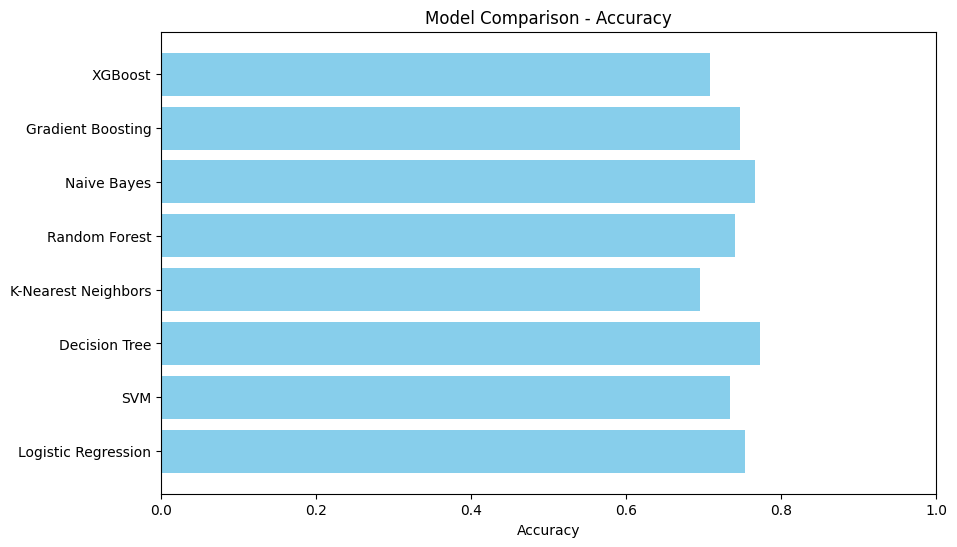

In [25]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Decision Tree', 'K-Nearest Neighbors',
          'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn,
              accuracy_rf, accuracy_nb, accuracy_gb, accuracy_xgb]


plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.show()


Total number of data points in the dataset: 768


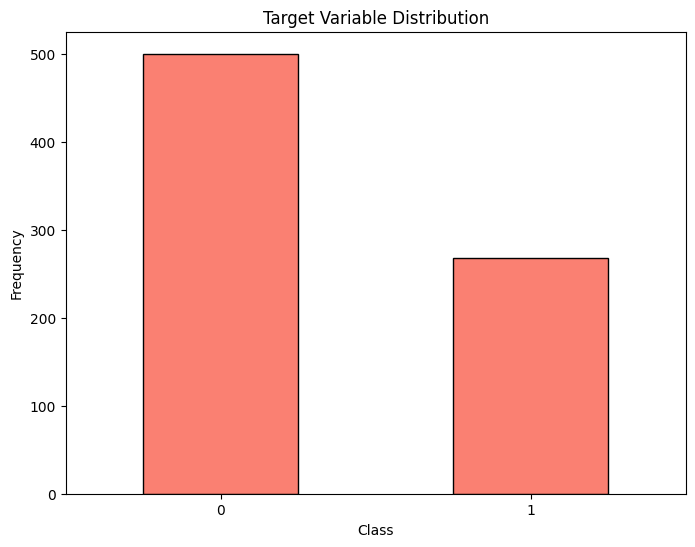

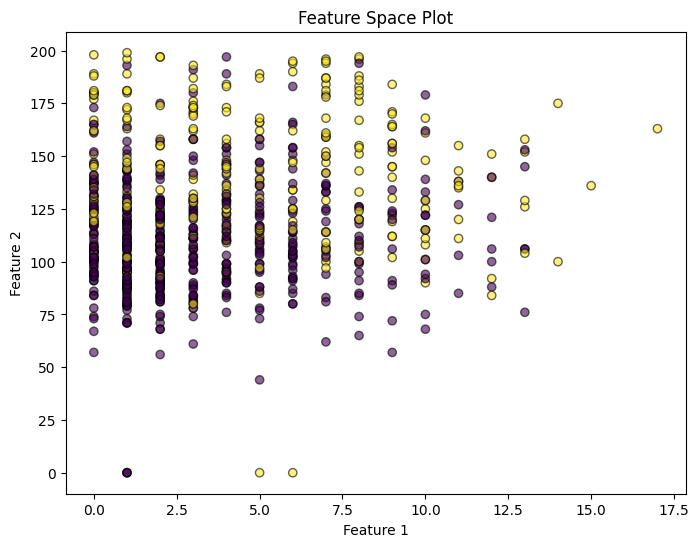

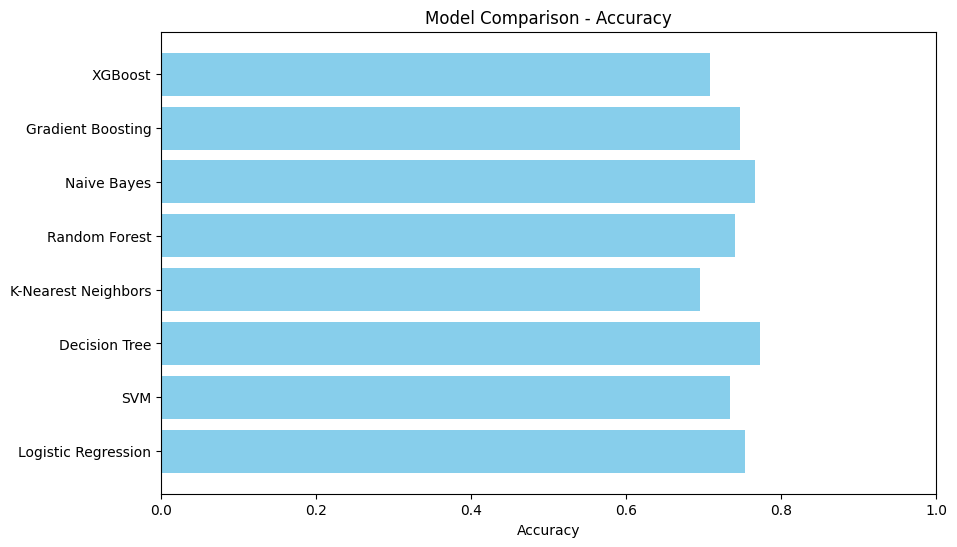

The final selected model is: Decision Tree with an accuracy of 0.7727


In [26]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


print("Total number of data points in the dataset:", len(X))


plt.figure(figsize=(8, 6))
y_value_counts = y.value_counts()
y_value_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(8, 6))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
plt.title('Feature Space Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


models = ['Logistic Regression', 'SVM', 'Decision Tree', 'K-Nearest Neighbors',
          'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']


accuracies = [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn,
              accuracy_rf, accuracy_nb, accuracy_gb, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.show()
accuracies_dict = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'K-Nearest Neighbors': accuracy_knn,
    'Random Forest': accuracy_rf,
    'Naive Bayes': accuracy_nb,
    'Gradient Boosting': accuracy_gb,
    'XGBoost': accuracy_xgb
}

best_model_name = max(accuracies_dict, key=accuracies_dict.get)
best_model_accuracy = accuracies_dict[best_model_name]

print(f"The final selected model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")
